In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
# !sudo apt-get install -y fonts-nanum
#!sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [ ]:
from matplotlib import font_manager, rc
import matplotlib
import platform
import matplotlib.pyplot as plt

%matplotlib inline


if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family = font_name)
else:
    rc('font',family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus']=False
%matplotlib inline

In [ ]:
data = pd.read_csv('tmk_bda_train.csv', encoding='cp949')

In [ ]:
data.head()

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N
1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N
3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y
4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y


In [ ]:
data.shape

(45875, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45875 entries, 0 to 45874
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scd            45875 non-null  int64  
 1   product_name   45875 non-null  object 
 2   net_order_qty  45875 non-null  int64  
 3   net_order_amt  45875 non-null  float64
 4   gender         45875 non-null  object 
 5   age_grp        45875 non-null  int64  
 6   employee_yn    45875 non-null  object 
 7   order_date     45875 non-null  int64  
 8   prime_yn       45875 non-null  object 
dtypes: float64(1), int64(4), object(4)
memory usage: 3.2+ MB


In [ ]:
print("총 데이터 개수: ", data.shape[0]*data.shape[1])
print("총 결측치 수: {} = 전체 데이터의 {:.2f}% ".format(data.isnull().sum().sum(), (data.isnull().sum().sum()*100)/(data.shape[0]*data.shape[1])))
print("전체 상품 수: ", data['product_name'].nunique())

총 데이터 개수:  412875
총 결측치 수: 0 = 전체 데이터의 0.00% 
전체 상품 수:  3113


In [ ]:
scd_noduplicates = data.drop_duplicates('scd')

In [ ]:
scd_noduplicates

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N
1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N
3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y
4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y
...,...,...,...,...,...,...,...,...,...
45854,20230101969653,리턴업 갱년기케어 500mgX60캡슐(1개월)X2개,1,10.449149,M,2,N,20230101,N
45855,20230101966525,비비고 순살 고등어구이 60g,9,10.112613,M,3,N,20230101,N
45860,20230102975115,[2023설사원선물신청] 흑삼정 골드클래스 100gx2,1,11.597276,M,5,Y,20230102,N
45869,20230101969615,리턴업 전립소 쏘팔메토 골드 1000mgX60캡슐(2개월)X2개,1,11.364344,F,2,Y,20230101,Y


In [ ]:
scd_noduplicates['prime_yn'].value_counts()

N    5328
Y    5325
Name: prime_yn, dtype: int64

<AxesSubplot:xlabel='prime_yn', ylabel='count'>

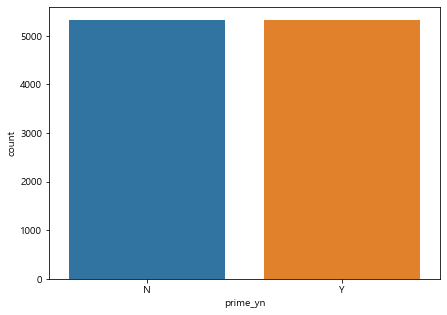

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x= scd_noduplicates['prime_yn'])

### 프라임 회원 5328, 비프라임 회원 5325로 거의 1:1로 동등한 비율이다.

In [ ]:
scd_noduplicates['employee_yn'].value_counts()

N    5940
Y    4713
Name: employee_yn, dtype: int64

<AxesSubplot:xlabel='employee_yn', ylabel='count'>

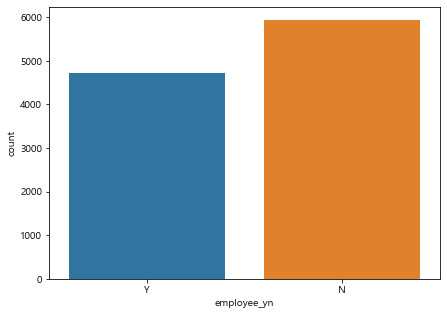

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(x= scd_noduplicates['employee_yn'])

### 전체 데이터 주문 건수는 임직원 주문 수 4713, 비임직원 주문 수는 5940이다.

# Label 분석

In [ ]:
scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'Y', 'prime_yn'].value_counts()

Y    2830
N    1883
Name: prime_yn, dtype: int64

In [ ]:
scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'N', 'prime_yn'].value_counts()

N    3445
Y    2495
Name: prime_yn, dtype: int64

### 임직원의 경우, 프라임 회원과 일반 회원의 비율이 약 60 : 40 정도의 비율이다.

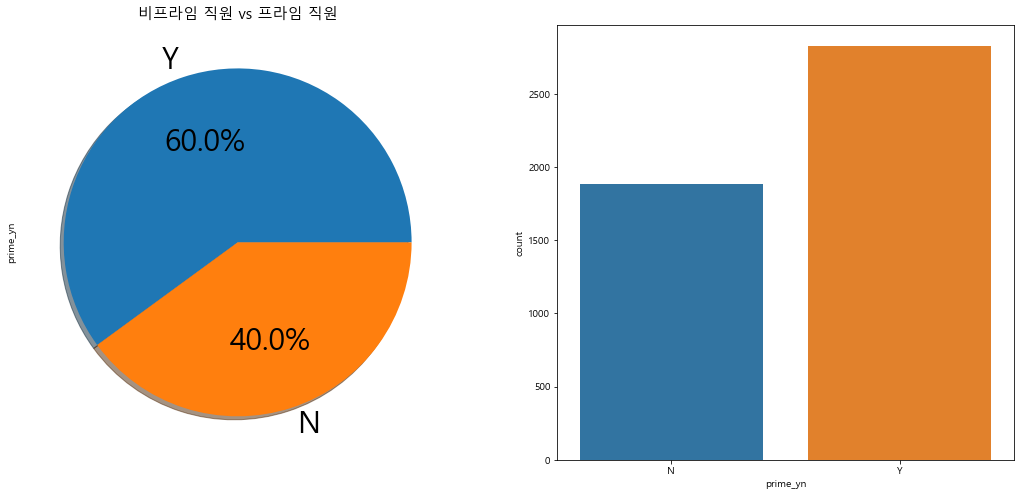

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'Y', 'prime_yn'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True,fontsize=30)
ax[0].set_title('비프라임 직원 vs 프라임 직원', size = 15)

#count plot
sns.countplot(x=scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'Y', 'prime_yn'], ax=ax[1])

plt.show()

### 비임직원의 경우, 프라임 회원과 일반 회원의 비율이 약 42 : 58 정도의 비율이다.

### 즉, 임직원일수록 프라임 회원의 비율이 더 높은 것을 알 수 있다.

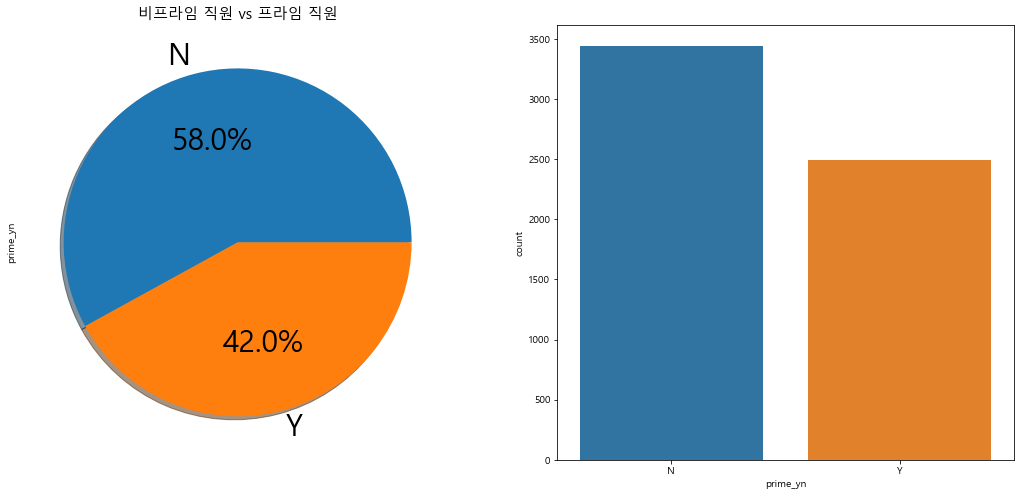

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'N', 'prime_yn'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True,fontsize=30)
ax[0].set_title('비프라임 직원 vs 프라임 직원', size = 15)

#count plot
sns.countplot(x=scd_noduplicates.loc[scd_noduplicates['employee_yn'] == 'N', 'prime_yn'], ax=ax[1])

plt.show()

# 가설1. 할인이나 가격 혜택을 받아 동일한 상품을 더 저렴한 가격에 구매한 회원 중에 프라임 회원이 많을 것이다.

In [ ]:
prime = data[data['prime_yn'] == 'Y']
nonprime = data[data['prime_yn'] == 'N']

## 프라임, 비프라임 회원 나눠서 각각의 그룹에서 [상품, 수량]으로 groupby하여, 구매한 가격의 평균을 비교해보도록 하겠습니다!

In [ ]:
prime_amt = prime.groupby(['product_name', 'net_order_qty'])['net_order_amt'].mean().to_frame().reset_index()
prime_amt.rename(columns={'net_order_amt' : 'net_order_amt_prime'}, inplace=True)
prime_amt

,product_name,net_order_qty,net_order_amt_prime
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.220281
1,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),2,10.914124
2,(냉동) 비비고 테이블 특설렁탕 700g,1,8.910623
3,(냉동) 비비고 테이블 특설렁탕 700g,2,9.708680
4,(냉동) 비비고 테이블 특설렁탕 700g,3,9.879576
...,...,...,...
5803,헬씨누리 침향환 환심 10환,1,9.514658
5804,헬씨누리 침향환 환심 10환X6입(1BOX)_행사,1,11.043706
5805,훈제대란 20구,1,9.126706
5806,훈제대란 20구,2,9.649498


In [ ]:
nonprime_amt = nonprime.groupby(['product_name', 'net_order_qty'])['net_order_amt'].mean().to_frame().reset_index()
nonprime_amt.rename(columns={'net_order_amt' : 'net_order_amt_nonprime'}, inplace=True)
nonprime_amt

,product_name,net_order_qty,net_order_amt_nonprime
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.270577
1,(냉동) 비비고 테이블 특설렁탕 700g,1,8.980387
2,(냉동) 비비고 테이블 특설렁탕 700g,2,9.713655
3,(냉동) 비비고 테이블 특설렁탕 700g,5,10.896758
4,(냉동) 비비고 테이블 특설렁탕 700gx2개,1,9.875140
...,...,...,...
4762,행복한콩 폭신폭신 두부볼 750g,3,10.263118
4763,헬씨누리 침향환 환심 10환,1,9.562475
4764,헬씨누리 침향환 환심 10환X6입(1BOX)_패밀리데이,1,11.091499
4765,훈제대란 20구,1,9.255307


In [ ]:
total_amt = pd.merge(prime_amt, nonprime_amt, on=['product_name', 'net_order_qty'])

In [ ]:
total_amt['is_prime_lower_amt'] = (total_amt['net_order_amt_prime'] < total_amt['net_order_amt_nonprime'])

In [ ]:
total_amt.head()

,product_name,net_order_qty,net_order_amt_prime,net_order_amt_nonprime,is_prime_lower_amt
0,(냉동) 비비고 테이블 특 선물세트 (특양지곰탕700gx2개+특설렁탕700gx1개),1,10.220281,10.270577,True
1,(냉동) 비비고 테이블 특설렁탕 700g,1,8.910623,8.980387,True
2,(냉동) 비비고 테이블 특설렁탕 700g,2,9.708680,9.713655,True
3,(냉동) 비비고 테이블 특설렁탕 700g,5,10.221152,10.896758,True
4,(냉동) 비비고 테이블 특설렁탕 700x2개+(냉동) 비비고 테이블 특양지곰탕 70...,1,10.536988,10.592361,True


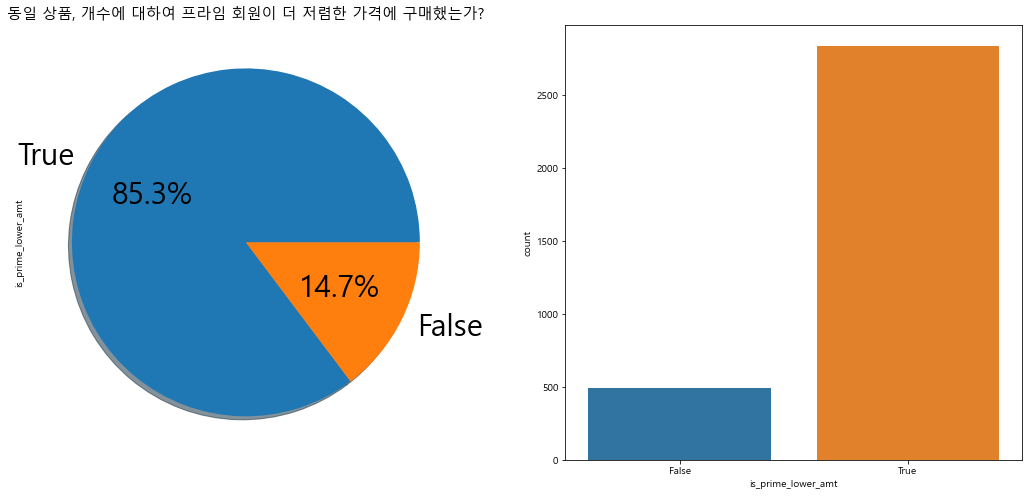

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

#pie plot
total_amt['is_prime_lower_amt'].value_counts().plot.pie(autopct='%1.1f%%', ax=ax[0], shadow=True, fontsize=30)
ax[0].set_title('동일 상품, 개수에 대하여 프라임 회원이 더 저렴한 가격에 구매했는가?', size = 15)

#count plot
sns.countplot(x=total_amt['is_prime_lower_amt'], ax=ax[1])

plt.show()

In [ ]:
print('동일 상품에 대한 프라임 회원의 평균 구매 가격: {}'.format(total_amt['net_order_amt_prime'].mean()))
print('동일 상품에 대한 비프라임 회원의 평균 구매 가격: {}'.format(total_amt['net_order_amt_nonprime'].mean()))

동일 상품에 대한 프라임 회원의 평균 구매 가격: 9.234180792979963
동일 상품에 대한 비프라임 회원의 평균 구매 가격: 9.315658015222485


# 가설2. 30~40대 회원 중에 프라임 회원이 많을 것이다.

In [ ]:
data_age = scd_noduplicates.groupby(['age_grp','prime_yn']).count()['product_name'].to_frame()
data_age.rename(columns={'product_name' : 'cnt'}, inplace=True)
data_age['prop'] = data_age['cnt'] / scd_noduplicates.groupby('age_grp')['product_name'].count() * 100

In [ ]:
data_age

cnt        prop
age_grp prime_yn                  
1       N           11  100.000000
2       N          668   58.906526
        Y          466   41.093474
3       N         1738   52.192192
        Y         1592   47.807808
4       N         1988   48.977581
        Y         2071   51.022419
5       N          798   43.678161
        Y         1029   56.321839
6       N          125   42.808219
        Y          167   57.191781

posx and posy should be finite values
posx and posy should be finite values


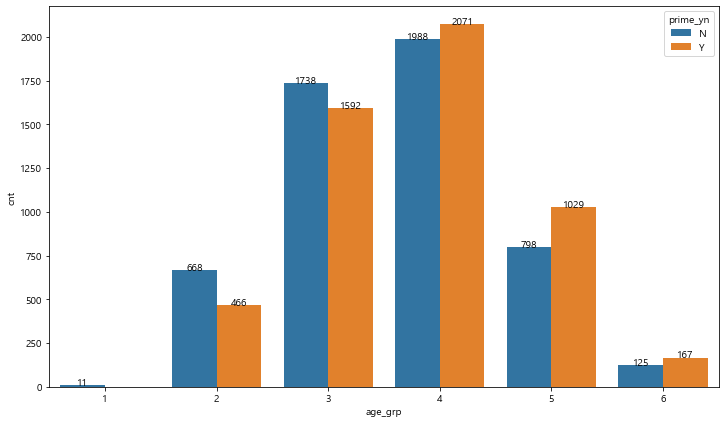

In [ ]:
data_age_reset_index = data_age.reset_index()
fig, ax = plt.subplots(1, figsize=(12, 7))
sns.barplot(x='age_grp', y='cnt', hue='prime_yn', data=data_age_reset_index)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha = 'center')

posx and posy should be finite values
posx and posy should be finite values


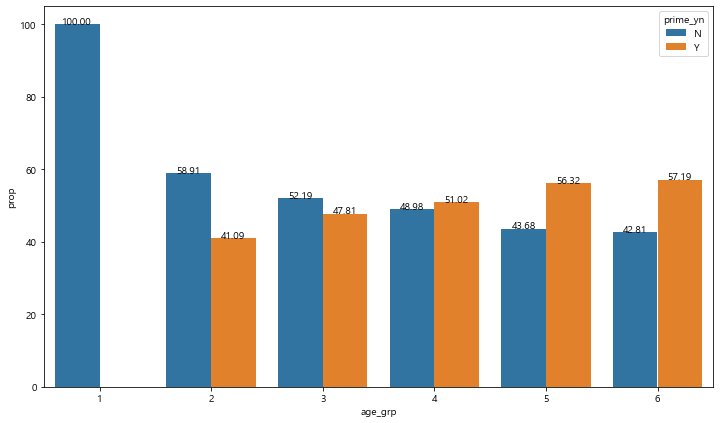

In [ ]:
data_age_reset_index = data_age.reset_index()
fig, ax = plt.subplots(1, figsize=(12, 7))
sns.barplot(x='age_grp', y='prop', hue='prime_yn', data=data_age_reset_index)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.2f}", ha = 'center')



-> age_group을 1~6까지 범주형으로 설정되어 있는 것을 확인할 수 있으며, age_group에 따라 CJ 더마켓을 이용하는 회원이 1, 6은 극소수, 2, 5는 소수, 3, 4가 압도적으로 많은 것으로 보아, 각각 {'1' : 10대, '2' : 20대, '3' : 30대, '4' : 40대, '5' : 50대, '6' : 60대 이상}으로 볼 수 있을 것 같다.

-> 프라임 회원의 비율은 연령대가 높아질수록, 조금씩 증가하는 추세를 보이지만, CJ더마켓의 이용자가 30-40대가 가장 많은 만큼, 30-40대의 프라임 회원의 수가 가장 많은 것을 확인할 수 있다.

-> 50, 60대층에서는 높은 프라임 회원의 비율을 나타내지만, 30-40대에 비해 CJ더마켓 이용자 수가 매우 적어, CJ더마켓의 매출을 늘리기 위해서는 마켓의 높은 회원수를 나타내고 있는 30-40대의 프라임 전환을 유도하는 것이 좋을 것 같다.

## 가설3. 여성 회원의 프라임 회원이 남성 회원보다 더 많을 것이다.

In [ ]:
data_age_gender = scd_noduplicates.groupby(['age_grp','gender', 'prime_yn']).count()['product_name'].to_frame()
data_age_gender.rename(columns={'product_name' : 'cnt'}, inplace=True)
data_age_gender['prop'] = data_age_gender['cnt'] / scd_noduplicates.groupby(['age_grp', 'gender'])['product_name'].count() * 100

In [ ]:
data_age_gender

cnt        prop
age_grp gender prime_yn                  
1       F      N            8  100.000000
        M      N            3  100.000000
2       F      N          393   62.579618
               Y          235   37.420382
        M      N          275   54.347826
               Y          231   45.652174
3       F      N          973   58.898305
               Y          679   41.101695
        M      N          765   45.589988
               Y          913   54.410012
4       F      N         1308   54.522718
               Y         1091   45.477282
        M      N          680   40.963855
               Y          980   59.036145
5       F      N          504   46.451613
               Y          581   53.548387
        M      N          294   39.622642
               Y          448   60.377358
6       F      N           67   43.506494
               Y           87   56.493506
        M      N           58   42.028986
               Y           80   57.971014

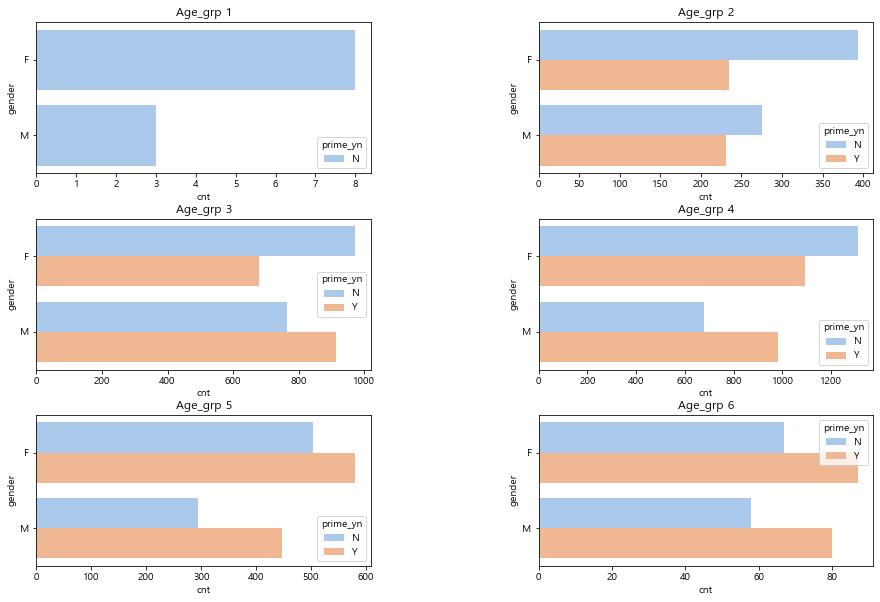

In [ ]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3,2)

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

age_groups= [i for i in range(1, 7)]

for idx, agegp in enumerate(age_groups):
    ax = plt.subplot(grid[idx])
    sns.barplot(y='gender',
                x='cnt',
                hue='prime_yn',
                data=data_age_gender.reset_index()[data_age_gender.reset_index()['age_grp'] == agegp],
                palette='pastel',
                ax=ax,
                ci=None
                )
    ax.set_title(f'Age_grp {agegp}')

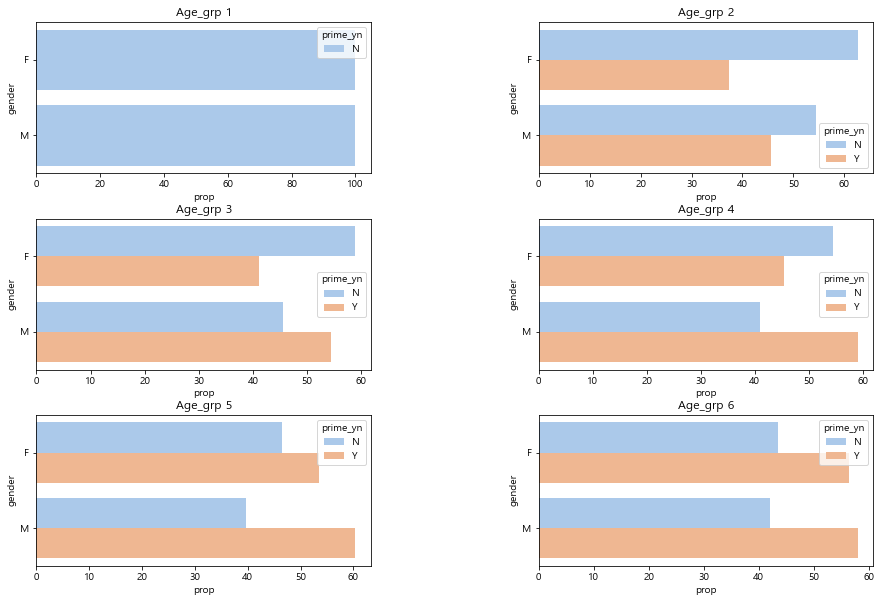

In [ ]:
import matplotlib.gridspec as gridspec
grid = gridspec.GridSpec(3,2)

plt.figure(figsize=(15,10))
plt.subplots_adjust(wspace=0.5, hspace=0.3)

age_groups= [i for i in range(1, 7)]

for idx, agegp in enumerate(age_groups):
    ax = plt.subplot(grid[idx])
    sns.barplot(y='gender',
                x='prop',
                hue='prime_yn',
                data=data_age_gender.reset_index()[data_age_gender.reset_index()['age_grp'] == agegp],
                palette='pastel',
                ax=ax,
                ci=None
                )
    ax.set_title(f'Age_grp {agegp}')

-> 연령, 성별별로 분류한 결과


20대의 경우, 여성이 남성보다 높은 이용률을 보이지만, 프라임 회원의 수는 남녀 모두 비슷하게 존재하며 (비율 상으로는 남자가 많다),

30대의 경우, 성별에 상관없이 남녀 모두 비슷한 수의 높은 이용률을 보이지만, 의외로 여성보다 남성의 프라임 이용률이 더 높았으며

40대의 경우, 여성회원 및 여성 프라임 회원이 더 많지만, 프라임 회원의 비율 상으로는 남자가 더 많은 분포,

50, 60대의 경우, 프라임 이용 고객이 남녀 모두 비프라임 고객보다 많지만, 여성회원이 더 높다는 점에서 비슷한 양상을 띈다.

즉, 여성의 경우 CJ더마켓 회원 수가 상대적으로 많은 만큼, 단순히 프라임 회원의 수는 남성보다 많지만, 비율 상으로는 20~60대 모든 층에서 남성의 프라임 회원의 비율이 더 높은 점을 알 수 있다.

In [ ]:
data[data['prime_yn'] == 'Y']

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn
3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y
4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y
6,20230125159705,햇반 매일찰잡곡밥 210g,20,9.994653,M,4,N,20230125,Y
8,20230125157569,고메 바삭쫄깃한 사천탕수육 450g,1,8.938007,M,4,Y,20230125,Y
10,20230125161346,더건강한 닭가슴살 소시지120g,8,9.784760,M,3,Y,20230125,Y
...,...,...,...,...,...,...,...,...,...
45868,20230102972321,고메 바삭쫄깃한 탕수육 450g,1,8.702510,M,5,Y,20230102,Y
45869,20230101969615,리턴업 전립소 쏘팔메토 골드 1000mgX60캡슐(2개월)X2개,1,11.364344,F,2,Y,20230101,Y
45870,20230102972321,고메 거멍 모짜체다핫도그 340g,1,8.648397,M,5,Y,20230102,Y
45873,20230101970142,[식물성]고메 플랜테이블 함박스테이크 150g,1,7.939872,M,4,Y,20230101,Y


# 가설 4. 주문하는 품목의 개수가 프라임 회원이 비프라임 회원보다 많을 것이다.

In [ ]:
prime_sum_qty = data[data['prime_yn'] == 'Y'].groupby('scd')[['net_order_qty']].sum()
prime_sum_qty

,net_order_qty
scd,
20230101963235,2
20230101963244,3
20230101963247,6
20230101963251,2
20230101963253,6
...,...
20230131216657,2
20230131216709,6
20230131216734,3


In [ ]:
nonprime_sum_qty = data[data['prime_yn'] == 'N'].groupby('scd')[['net_order_qty']].sum()
nonprime_sum_qty

,net_order_qty
scd,
20230101963226,6
20230101963302,17
20230101963317,3
20230101963319,23
20230101963345,1
...,...
20230131216565,4
20230131216674,4
20230131216756,3


In [ ]:
print('프라임 회원의 주문 건당 평균 주문 상품 개수 : {}'.format(prime_sum_qty['net_order_qty'].mean()))
print('비프라임 회원의 주문 건당 평균 주문 상품 개수 : {}'.format(nonprime_sum_qty['net_order_qty'].mean()))

프라임 회원의 주문 건당 평균 주문 상품 개수 : 8.227981220657277
비프라임 회원의 주문 건당 평균 주문 상품 개수 : 6.4624624624624625


In [ ]:
print('프라임 회원의 주문 건당 중위값 주문 상품 개수 : {}'.format(prime_sum_qty['net_order_qty'].median()))
print('비프라임 회원의 주문 건당 중위값 주문 상품 개수 : {}'.format(nonprime_sum_qty['net_order_qty'].median()))

프라임 회원의 주문 건당 중위값 주문 상품 개수 : 5.0
비프라임 회원의 주문 건당 중위값 주문 상품 개수 : 4.0


In [ ]:
prime_qty_valcnt = prime_sum_qty.value_counts().sort_index().to_frame().reset_index()
prime_qty_valcnt.rename(columns={0:'cnt'}, inplace=True)
prime_qty_valcnt['prime_yn'] = 'Y'
prime_qty_valcnt['prop'] = prime_qty_valcnt['cnt'] / prime_qty_valcnt['cnt'].sum() * 100
prime_qty_valcnt.sort_values(by='net_order_qty').head()

,net_order_qty,cnt,prime_yn,prop
0,1,1062,Y,19.943662
1,2,649,Y,12.187793
2,3,459,Y,8.619718
3,4,372,Y,6.985915
4,5,370,Y,6.948357


In [ ]:
prime_qty_valcnt['cummulative_prop'] = 0.0
for i in range(len(prime_qty_valcnt)):
    temp = 0.0
    for j in range(i+1):
        temp += prime_qty_valcnt['prop'][j]
    prime_qty_valcnt['cummulative_prop'][i] = temp

prime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1062,Y,19.943662,19.943662
1,2,649,Y,12.187793,32.131455
2,3,459,Y,8.619718,40.751174
3,4,372,Y,6.985915,47.737089
4,5,370,Y,6.948357,54.685446
...,...,...,...,...,...
74,91,1,Y,0.018779,99.924883
75,96,1,Y,0.018779,99.943662
76,112,1,Y,0.018779,99.962441
77,116,1,Y,0.018779,99.981221


In [ ]:
prime_qty_valcnt.head(30)

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1062,Y,19.943662,19.943662
1,2,649,Y,12.187793,32.131455
2,3,459,Y,8.619718,40.751174
3,4,372,Y,6.985915,47.737089
4,5,370,Y,6.948357,54.685446
5,6,294,Y,5.521127,60.206573
6,7,230,Y,4.319249,64.525822
7,8,207,Y,3.887324,68.413146
8,9,157,Y,2.948357,71.361502
9,10,201,Y,3.774648,75.136150


In [ ]:
nonprime_qty_valcnt = nonprime_sum_qty.value_counts().sort_index().to_frame().reset_index()
nonprime_qty_valcnt.rename(columns={0:'cnt'}, inplace=True)
nonprime_qty_valcnt['prime_yn'] = 'N'
nonprime_qty_valcnt['prop'] = nonprime_qty_valcnt['cnt'] / nonprime_qty_valcnt['cnt'].sum() * 100
nonprime_qty_valcnt.sort_values(by='net_order_qty').head()

,net_order_qty,cnt,prime_yn,prop
0,1,1183,N,22.203453
1,2,707,N,13.269520
2,3,505,N,9.478228
3,4,491,N,9.215465
4,5,421,N,7.901652


In [ ]:
nonprime_qty_valcnt['cummulative_prop'] = 0.0
for i in range(len(nonprime_qty_valcnt)):
    temp = 0.0
    for j in range(i+1):
        temp += nonprime_qty_valcnt['prop'][j]
    nonprime_qty_valcnt['cummulative_prop'][i] = temp

nonprime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1183,N,22.203453,22.203453
1,2,707,N,13.269520,35.472973
2,3,505,N,9.478228,44.951201
3,4,491,N,9.215465,54.166667
4,5,421,N,7.901652,62.068318
...,...,...,...,...,...
62,104,1,N,0.018769,99.924925
63,118,1,N,0.018769,99.943694
64,125,1,N,0.018769,99.962462
65,180,1,N,0.018769,99.981231


In [ ]:
nonprime_qty_valcnt.head(30)

,net_order_qty,cnt,prime_yn,prop,cummulative_prop
0,1,1183,N,22.203453,22.203453
1,2,707,N,13.269520,35.472973
2,3,505,N,9.478228,44.951201
3,4,491,N,9.215465,54.166667
4,5,421,N,7.901652,62.068318
5,6,324,N,6.081081,68.149399
6,7,248,N,4.654655,72.804054
7,8,214,N,4.016517,76.820571
8,9,140,N,2.627628,79.448198
9,10,183,N,3.434685,82.882883


In [ ]:
totprime_qty_valcnt = pd.concat([prime_qty_valcnt.head(30), nonprime_qty_valcnt.head(30)])
totprime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop
0,1,1062,Y,19.943662
1,2,649,Y,12.187793
2,3,459,Y,8.619718
3,4,372,Y,6.985915
4,5,370,Y,6.948357
5,6,294,Y,5.521127
6,7,230,Y,4.319249
7,8,207,Y,3.887324
8,9,157,Y,2.948357
9,10,201,Y,3.774648


### 수량 합 개수의 분포 (net_qty가 커질수록, prime, unprime에서 겹치는 숫자가 없어서, net_qty  30까지만 시각화 해보겠습니다. prime 회원중 총 net_qty가 30 이하인 고객 비율이 96.4%, unprime 회원은 98.3% 정도이므로 설명력은 충분하다고 생각합니다. 30보다 큰 부분은 밑에 따로 비율을 계산하여 출력하였습니다.)

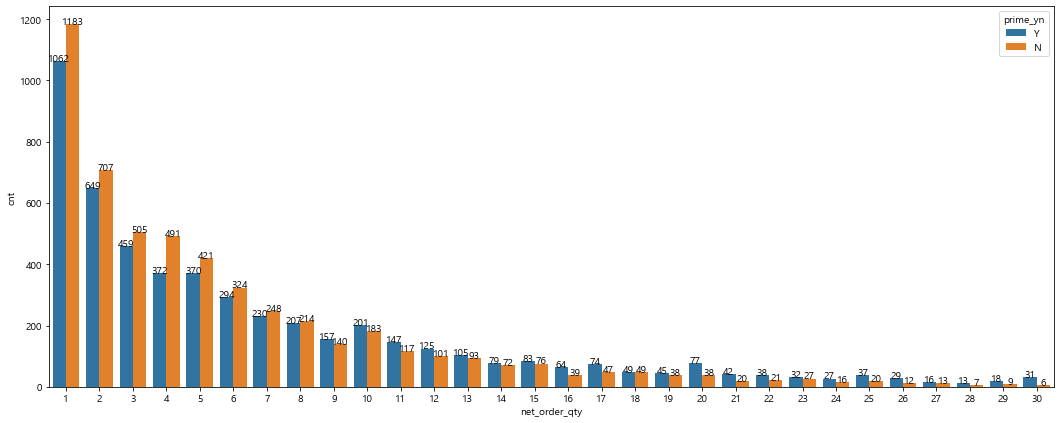

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(x='net_order_qty', y='cnt', data=totprime_qty_valcnt, hue='prime_yn')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha = 'center')

### 수량 합 비율의 분포 (숫자가 커질수록, 겹치는 숫자가 없어서, net_qty 30까지만 시각화 해보겠습니다.)

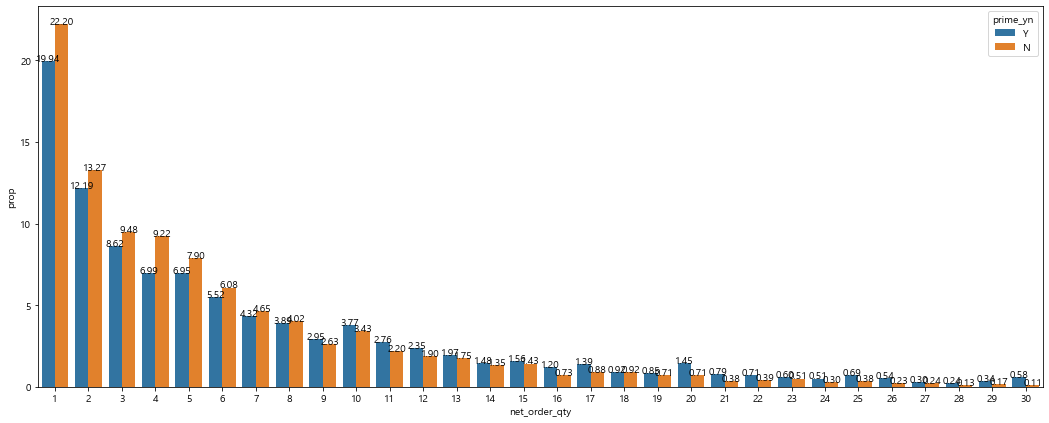

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(x='net_order_qty', y='prop', data=totprime_qty_valcnt, hue='prime_yn')
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.2f}", ha = 'center')

In [ ]:
totprime_qty_valcnt

,net_order_qty,cnt,prime_yn,prop
0,1,1062,Y,19.943662
1,2,649,Y,12.187793
2,3,459,Y,8.619718
3,4,372,Y,6.985915
4,5,370,Y,6.948357
5,6,294,Y,5.521127
6,7,230,Y,4.319249
7,8,207,Y,3.887324
8,9,157,Y,2.948357
9,10,201,Y,3.774648


In [ ]:
print("프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): {}".format(prime_qty_valcnt[prime_qty_valcnt['net_order_qty'] > 30]['prop'].sum()))
print("비프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): {}".format(nonprime_qty_valcnt[nonprime_qty_valcnt['net_order_qty'] > 30]['prop'].sum()))

프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): 3.624413145539906
비프라임 회원 중 1월달 구매 수량의 합이 30 이상인 고객의 비율(%): 1.7079579579579578


> 그래프에 나타내지는 않았던 net_order_qty가 30보다 큰 집단에서는 prime 회원의 약 3.62%, nonprime 회원의 약 1.70% 정도가 분포하는 것을 알 수 있으며, 결국에는 net_order_qty가 큰 집단에 더 많은 prime 회원이 분포해있는 것을 알 수 있다.

### 즉, 주문 상품의 개수가 1~8개일때는, 비프라임 회원이 프라임 회원보다 많지만, 주문 상품 개수가 9개 이상일 때는, 프라임 회원이 비프라임 회원을 앞지르기 시작한다. (9-30개에서 거의 대부분 프라임 회원의 비율이 많게 나타났으며, 31개 이상 그룹에서도 프라임 회원이 3.62%인 반면 비프라임 회원이 1.70%로 2배 이상 차이나는 분포를 확인할 수 있다.)

In [ ]:
data['product_name']

0                        잔칫집 식혜 240ml 30입
1                       백설 한입쏙 비엔나 120g*2
2                          비비고 왕교자 1.05kg
3                       고메 바삭쫄깃한 탕수육 900g
4                            햇반 매일잡곡밥210g
                       ...               
45870                  고메 거멍 모짜체다핫도그 340g
45871           [앱전용특가]비비고 차돌된장찌개 460gX4개
45872           [앱전용특가]비비고 차돌된장찌개 460gX4개
45873           [식물성]고메 플랜테이블 함박스테이크 150g
45874    리턴업 전립소 쏘팔메토 골드 1000mgX60캡슐(2개월)
Name: product_name, Length: 45875, dtype: object

# 가설5. 인기상품일수록, 프라임 고객이 신규 고객보다 더 많이 사는 경향이 있는가?

-> 전체 상품을 value_counts 하여, 내림차순으로 정렬 후 전체 구매 건수의 누적 20%를 차지하는 상품까지 인기 상품으로 가정하겠습니다.

In [ ]:
data['product_name'].value_counts()

비비고 사골곰탕 500g                            305
비비고 사골곰탕 500gX18개(1box)                  254
[500개한정]고메 중화짬뽕 652gX2개                  244
고메 중화짬뽕 652g                             240
비비고 수제진한김치만두 400gx2                      235
                                        ... 
[임직원]리턴업 아이시안 멀티케어 골드 600mgX30캡슐(1개월)      1
새싹보리 500mlX24개_오특                          1
BYO 식물성유산균 우먼 30포(1개월)X6개                  1
해찬들 우리쌀로 만든 태양초골드고추장 1kgX2개                1
[2023설선물세트]호주산 LA 갈비 1.8kg                 1
Name: product_name, Length: 3113, dtype: int64

In [ ]:
total_cnt = 0

for i in range(data['product_name'].nunique()):
    if total_cnt >= data['product_name'].value_counts().sum() * 0.2:
        print(i)
        break
    total_cnt += data['product_name'].value_counts()[i]


62


In [ ]:
data['product_name'].value_counts().head(63)

비비고 사골곰탕 500g                                                                305
비비고 사골곰탕 500gX18개(1box)                                                      254
[500개한정]고메 중화짬뽕 652gX2개                                                      244
고메 중화짬뽕 652g                                                                 240
비비고 수제진한김치만두 400gx2                                                          235
                                                                            ... 
[700개한정]햄스빌 굿베이컨130g*2X2개                                                     96
비비고 언양식 바싹불고기 460g                                                            96
고메 크리스피너겟 450g                                                                96
비비고 감자탕 460g                                                                  95
[500개한정]비비고 순살고등어구이 60g+비비고 노릇하게 구운 갈치구이 70g+비비고 순살삼치구이 60g+비비고 고등어구이 60g     95
Name: product_name, Length: 63, dtype: int64

In [ ]:
data['product_name'].value_counts()[data['product_name'].value_counts() == 95]

비비고 감자탕 460g                                                                 95
[500개한정]비비고 순살고등어구이 60g+비비고 노릇하게 구운 갈치구이 70g+비비고 순살삼치구이 60g+비비고 고등어구이 60g    95
[500개한정]둥근햇반 210gx3입X12개                                                     95
비비고 소고기 미역국 500gX6개                                                          95
Name: product_name, dtype: int64

### 구매 건수가 95인 상품이 4개이므로, 62~65위까지로 파악하여, 구매 건이 많은 상위 65개의 상품을 인기상품으로 정의하겠습니다.

In [ ]:
data['product_name'].value_counts().head(65).index

Index(['비비고 사골곰탕 500g', '비비고 사골곰탕 500gX18개(1box)', '[500개한정]고메 중화짬뽕 652gX2개',
       '고메 중화짬뽕 652g', '비비고 수제진한김치만두 400gx2', '비비고 진한고기만두400g*2번들',
       '비비고 도톰동그랑땡 560g', '[500개한정]가쓰오우동 4인분 933.2gX2개', '비비고 왕교자 1.05kg',
       '[UPCYCLE]햇반 210gx24개(1box)', '[1000개한정]비비고 왕교자 1.05kgX2개',
       '[500개한정] CJ명가 한식간장김자반50gX2개', '비비고 물만두 370gx2개',
       '[UPCYCLE]햇반 발아현미밥 210gx24개(1box)', '비비고 갈비탕 400g', '고메 바삭쫄깃한 탕수육 450g',
       '비비고 남도떡갈비 450g', '[2000개한정]고메 바삭쫄깃한 탕수육 450gX2개', '비비고 육개장 500g',
       '고메 바삭튀겨낸통등심돈카츠450g', '[400개한정]고메 함박스테이크 152gX6개',
       '[500개한정]행복한콩2가지국산콩부침찌개300g*2x2개', '[UPCYCLE]햇반 매일찰잡곡밥 210gx24개(1box)',
       '비비고 한입떡갈비 282gx2개', '비비고 왕교자 1.05kgX2개', '비비고 순살 고등어구이 60g',
       '비비고 소고기 미역국 500g', '가쓰오우동 4인분 933.2g', '행복한콩 2가지로만 국산콩두부 부침찌개300gX2',
       '밀당의고수 바삭한 김말이 400g', '[UPCYCLE]햇반 흑미밥 210gx24개(1box)',
       '비비고 깻잎고기만두400g*2', '비비고 소고기장조림 125g',
       '[500개한정]고메 바삭쫄깃한 탕수육 450g+바삭촉촉한 깐풍기 450g', '[300개한정]비비고 남도떡갈비 450gX2개',
       '비비고 왕교자 455gx2개', '고

In [ ]:
pop_products

Index(['비비고 사골곰탕 500g', '비비고 사골곰탕 500gX18개(1box)', '[500개한정]고메 중화짬뽕 652gX2개',
       '고메 중화짬뽕 652g', '비비고 수제진한김치만두 400gx2', '비비고 진한고기만두400g*2번들',
       '비비고 도톰동그랑땡 560g', '[500개한정]가쓰오우동 4인분 933.2gX2개', '비비고 왕교자 1.05kg',
       '[UPCYCLE]햇반 210gx24개(1box)', '[1000개한정]비비고 왕교자 1.05kgX2개',
       '[500개한정] CJ명가 한식간장김자반50gX2개', '비비고 물만두 370gx2개',
       '[UPCYCLE]햇반 발아현미밥 210gx24개(1box)', '비비고 갈비탕 400g', '고메 바삭쫄깃한 탕수육 450g',
       '비비고 남도떡갈비 450g', '[2000개한정]고메 바삭쫄깃한 탕수육 450gX2개', '비비고 육개장 500g',
       '고메 바삭튀겨낸통등심돈카츠450g', '[400개한정]고메 함박스테이크 152gX6개',
       '[500개한정]행복한콩2가지국산콩부침찌개300g*2x2개', '[UPCYCLE]햇반 매일찰잡곡밥 210gx24개(1box)',
       '비비고 한입떡갈비 282gx2개', '비비고 왕교자 1.05kgX2개', '비비고 순살 고등어구이 60g',
       '비비고 소고기 미역국 500g', '가쓰오우동 4인분 933.2g', '행복한콩 2가지로만 국산콩두부 부침찌개300gX2',
       '밀당의고수 바삭한 김말이 400g', '[UPCYCLE]햇반 흑미밥 210gx24개(1box)',
       '비비고 깻잎고기만두400g*2', '비비고 소고기장조림 125g',
       '[500개한정]고메 바삭쫄깃한 탕수육 450g+바삭촉촉한 깐풍기 450g', '[300개한정]비비고 남도떡갈비 450gX2개',
       '비비고 왕교자 455gx2개', '고

In [ ]:
pop_products = data['product_name'].value_counts().head(65).index

In [ ]:
data['pop_prod_yn'] = data['product_name'].isin(pop_products)

In [ ]:
data

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,pop_prod_yn
0,20230124153976,잔칫집 식혜 240ml 30입,1,9.803170,F,2,Y,20230124,N,False
1,20230124155563,백설 한입쏙 비엔나 120g*2,1,8.256607,M,3,Y,20230124,N,False
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N,True
3,20230126164638,고메 바삭쫄깃한 탕수육 900g,1,9.667259,F,4,N,20230126,Y,False
4,20230125159705,햇반 매일잡곡밥210g,20,9.994653,M,4,N,20230125,Y,False
...,...,...,...,...,...,...,...,...,...,...
45870,20230102972321,고메 거멍 모짜체다핫도그 340g,1,8.648397,M,5,Y,20230102,Y,False
45871,20230102972720,[앱전용특가]비비고 차돌된장찌개 460gX4개,1,9.639327,F,3,N,20230102,N,False
45872,20230101964953,[앱전용특가]비비고 차돌된장찌개 460gX4개,1,9.639327,F,4,N,20230101,N,False
45873,20230101970142,[식물성]고메 플랜테이블 함박스테이크 150g,1,7.939872,M,4,Y,20230101,Y,False


In [ ]:
pop_data = data[data['pop_prod_yn'] == True]
pop_data

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,pop_prod_yn
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N,True
5,20230126167696,[UPCYCLE]햇반 흑미밥 210gx24개(1box),1,10.125110,F,3,N,20230126,N,True
13,20230125159833,고메 치즈크리스피핫도그 340g,1,8.327001,F,4,N,20230125,Y,True
14,20230111075349,비비고 깻잎고기만두400g*2,1,8.850947,F,6,N,20230111,N,True
18,20230124154184,고메 중화짬뽕 652g,8,10.614106,F,3,N,20230124,N,True
...,...,...,...,...,...,...,...,...,...,...
45849,20230101967892,비비고 육개장 500g,1,8.455743,F,5,Y,20230101,Y,True
45852,20230101963370,고메 크리스피너겟 450g,1,8.622454,M,4,N,20230101,Y,True
45855,20230101966525,비비고 순살 고등어구이 60g,9,10.112613,M,3,N,20230101,N,True
45863,20230101965870,비비고 남도떡갈비 450g,1,9.006632,F,5,N,20230101,N,True


In [ ]:
pop_qty = pop_data.groupby(['product_name','prime_yn'])['net_order_qty'].sum().reset_index()

In [ ]:
pop_qty

,product_name,prime_yn,net_order_qty
0,[1000개한정]고메 바삭튀겨낸통등심돈카츠450gX2개,N,68
1,[1000개한정]고메 바삭튀겨낸통등심돈카츠450gX2개,Y,43
2,[1000개한정]비비고 왕교자 1.05kgX2개,N,131
3,[1000개한정]비비고 왕교자 1.05kgX2개,Y,110
4,[1000개한정]비비고 왕교자 1.05kgX2개+고메 바삭튀겨낸통등심돈카츠450g,N,69
...,...,...,...
125,햇반 쿡반 참치마요주먹밥 500g,Y,57
126,햇반쿡반 김치치즈주먹밥 500g,N,118
127,햇반쿡반 김치치즈주먹밥 500g,Y,65
128,행복한콩 2가지로만 국산콩두부 부침찌개300gX2,N,76


In [ ]:
pop_qty_Y = pop_qty[pop_qty['prime_yn'] == 'Y']
pop_qty_Y

,product_name,prime_yn,net_order_qty
1,[1000개한정]고메 바삭튀겨낸통등심돈카츠450gX2개,Y,43
3,[1000개한정]비비고 왕교자 1.05kgX2개,Y,110
5,[1000개한정]비비고 왕교자 1.05kgX2개+고메 바삭튀겨낸통등심돈카츠450g,Y,39
7,[2000개한정]고메 바삭쫄깃한 탕수육 450gX2개,Y,82
9,[200개한정]The더건강한 그릴비엔나 200g*2X2개,Y,51
...,...,...,...
121,비비고 한입떡갈비 282gx2개,Y,76
123,햇반 210gx36개,Y,83
125,햇반 쿡반 참치마요주먹밥 500g,Y,57
127,햇반쿡반 김치치즈주먹밥 500g,Y,65


In [ ]:
pop_qty_N = pop_qty[pop_qty['prime_yn'] == 'N']
pop_qty_N

,product_name,prime_yn,net_order_qty
0,[1000개한정]고메 바삭튀겨낸통등심돈카츠450gX2개,N,68
2,[1000개한정]비비고 왕교자 1.05kgX2개,N,131
4,[1000개한정]비비고 왕교자 1.05kgX2개+고메 바삭튀겨낸통등심돈카츠450g,N,69
6,[2000개한정]고메 바삭쫄깃한 탕수육 450gX2개,N,118
8,[200개한정]The더건강한 그릴비엔나 200g*2X2개,N,66
...,...,...,...
120,비비고 한입떡갈비 282gx2개,N,106
122,햇반 210gx36개,N,69
124,햇반 쿡반 참치마요주먹밥 500g,N,98
126,햇반쿡반 김치치즈주먹밥 500g,N,118


In [ ]:
pop_products_list = list(pop_products)

In [ ]:
pop_products_list.index('비비고 사골곰탕 500g')

0

In [ ]:
pop_qty_YN = pd.merge(pop_qty_Y, pop_qty_N, on='product_name')
pop_qty_YN.rename(columns={'net_order_qty_x' : 'prime_qty', 'net_order_qty_y' : 'prime_qty_y'})
pop_qty_YN['rank'] = ''
for i in range(len(pop_qty_YN)):
    pop_qty_YN['rank'][i] = pop_products_list.index(pop_qty_YN['product_name'][i]) + 1

In [ ]:
pop_qty_YN['net_order_qty_x'] > pop_qty_YN['net_order_qty_y']

0     False
1     False
2     False
3     False
4     False
      ...  
60    False
61     True
62    False
63    False
64     True
Length: 65, dtype: bool

In [ ]:
pop_qty_YN['is_prime_higher'] = pop_qty_YN['net_order_qty_x'] > pop_qty_YN['net_order_qty_y']

In [ ]:
pop_qty_YN

,product_name,prime_yn_x,net_order_qty_x,prime_yn_y,net_order_qty_y,rank,is_prime_higher
0,[1000개한정]고메 바삭튀겨낸통등심돈카츠450gX2개,Y,43,N,68,46,False
1,[1000개한정]비비고 왕교자 1.05kgX2개,Y,110,N,131,11,False
2,[1000개한정]비비고 왕교자 1.05kgX2개+고메 바삭튀겨낸통등심돈카츠450g,Y,39,N,69,48,False
3,[2000개한정]고메 바삭쫄깃한 탕수육 450gX2개,Y,82,N,118,18,False
4,[200개한정]The더건강한 그릴비엔나 200g*2X2개,Y,51,N,66,40,False
...,...,...,...,...,...,...,...
60,비비고 한입떡갈비 282gx2개,Y,76,N,106,24,False
61,햇반 210gx36개,Y,83,N,69,39,True
62,햇반 쿡반 참치마요주먹밥 500g,Y,57,N,98,51,False
63,햇반쿡반 김치치즈주먹밥 500g,Y,65,N,118,50,False


In [ ]:
pop_qty_YN.sort_values(by='rank')

,product_name,prime_yn_x,net_order_qty_x,prime_yn_y,net_order_qty_y,rank,is_prime_higher
41,비비고 사골곰탕 500g,Y,908,N,660,1,True
42,비비고 사골곰탕 500gX18개(1box),Y,171,N,182,2,False
11,[500개한정]고메 중화짬뽕 652gX2개,Y,143,N,154,3,False
26,고메 중화짬뽕 652g,Y,197,N,223,4,False
47,비비고 수제진한김치만두 400gx2,Y,161,N,138,5,True
...,...,...,...,...,...,...,...
28,고메 크리스피너겟 450g,Y,54,N,57,61,False
35,비비고 감자탕 460g,Y,90,N,86,62,True
13,[500개한정]비비고 순살고등어구이 60g+비비고 노릇하게 구운 갈치구이 70g+비...,Y,51,N,68,63,False
12,[500개한정]둥근햇반 210gx3입X12개,Y,51,N,48,64,True


In [ ]:
pop_qty_YN[pop_qty_YN['is_prime_higher']]['rank'].sort_values().head(10)

41     1
47     5
59     6
7     12
40    13
57    19
14    22
18    23
48    26
43    27
Name: rank, dtype: object

> random guess 한 분포처럼 출력되므로 상품의 인기 순위가 높을수록 prime 회원이 더 많이 구매했다고 단정짓기 어렵다.

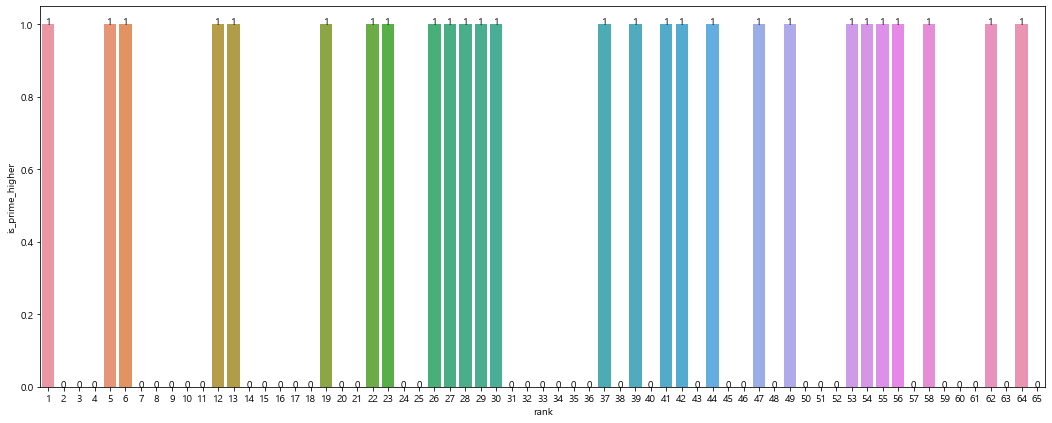

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(x='rank', y='is_prime_higher', data=pop_qty_YN)
for p in ax.patches:
    ax.text(p.get_x() + (p.get_width()/2) , p.get_y() + p.get_height(), f"{p.get_height():.0f}", ha = 'center')

In [ ]:
pop_qty_YN.dtypes

product_name       object
prime_yn_x         object
net_order_qty_x     int64
prime_yn_y         object
net_order_qty_y     int64
rank               object
is_prime_higher      bool
dtype: object

In [ ]:
pop_qty_YN['rank'] = pop_qty_YN['rank'].astype(int)

<AxesSubplot:>

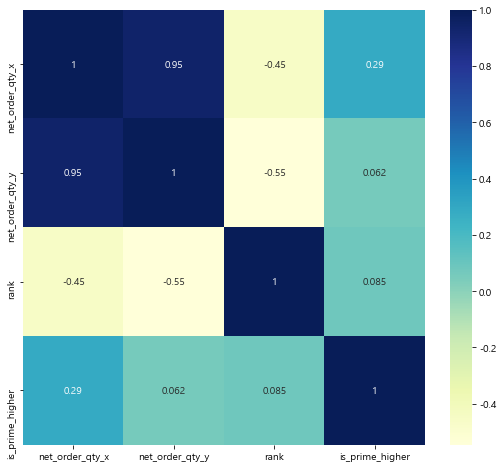

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(9, 8))
sns.heatmap(pop_qty_YN.corr(), annot=True, cmap='YlGnBu', ax=ax)

> rank와 is_prime_higher의 상관관계는 0.085로, 인기있는 상품일수록 프라임 회원이 더 많이 구매하는 경향이 있다는 가정에 모순된다.

### 1 ~ 13위 상품

In [ ]:
pop_products[:13]

Index(['비비고 사골곰탕 500g', '비비고 사골곰탕 500gX18개(1box)', '[500개한정]고메 중화짬뽕 652gX2개',
       '고메 중화짬뽕 652g', '비비고 수제진한김치만두 400gx2', '비비고 진한고기만두400g*2번들',
       '비비고 도톰동그랑땡 560g', '[500개한정]가쓰오우동 4인분 933.2gX2개', '비비고 왕교자 1.05kg',
       '[UPCYCLE]햇반 210gx24개(1box)', '[1000개한정]비비고 왕교자 1.05kgX2개',
       '[500개한정] CJ명가 한식간장김자반50gX2개', '비비고 물만두 370gx2개'],
      dtype='object')

<AxesSubplot:xlabel='net_order_qty', ylabel='product_name'>

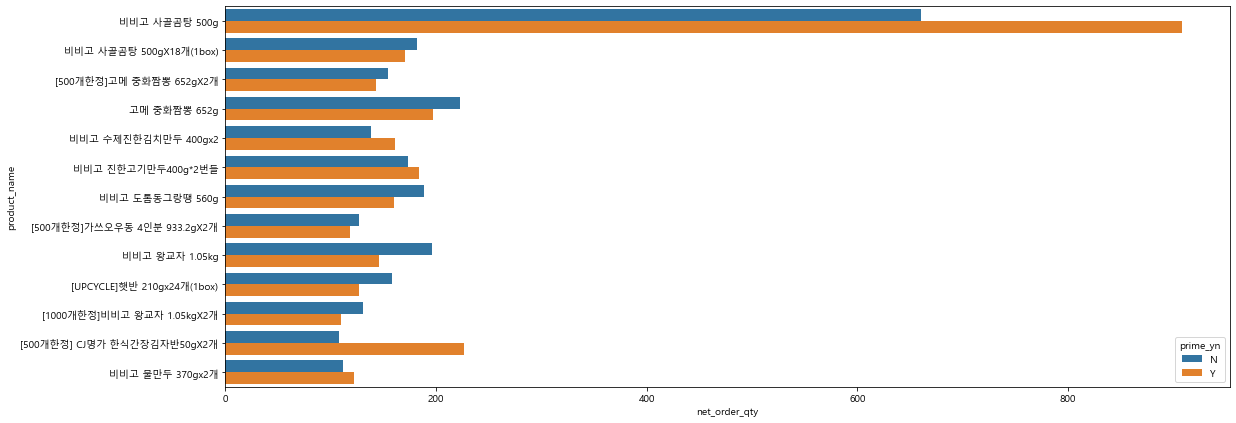

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(y='product_name', x='net_order_qty', data=pop_qty[pop_qty['product_name'].isin(pop_products[:13])], order =pop_products[:13], hue='prime_yn')

### 14~26위 상품

<AxesSubplot:xlabel='net_order_qty', ylabel='product_name'>

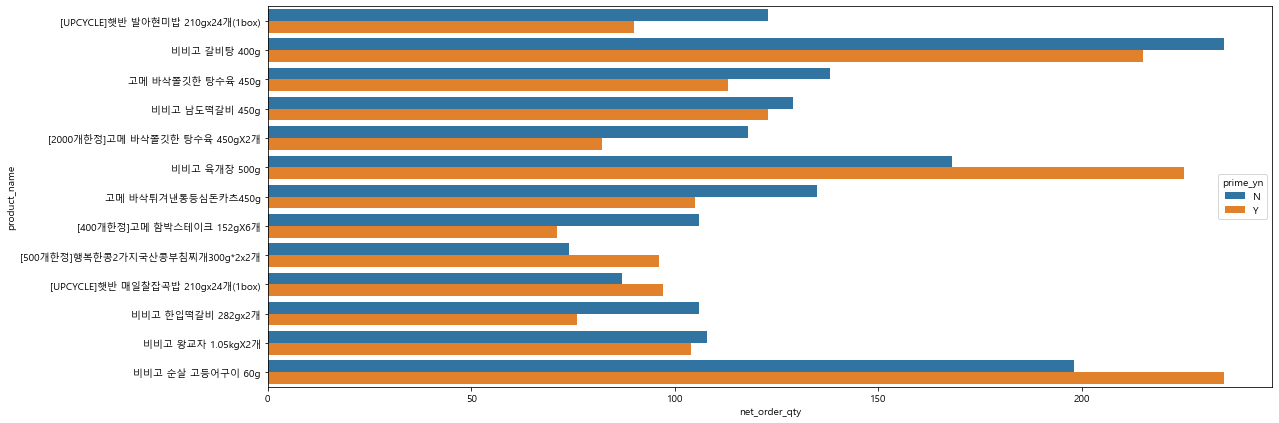

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(y='product_name', x='net_order_qty', data=pop_qty[pop_qty['product_name'].isin(pop_products[13:26])], order =pop_products[13:26], hue='prime_yn')

### 27~39위 상품

<AxesSubplot:xlabel='net_order_qty', ylabel='product_name'>

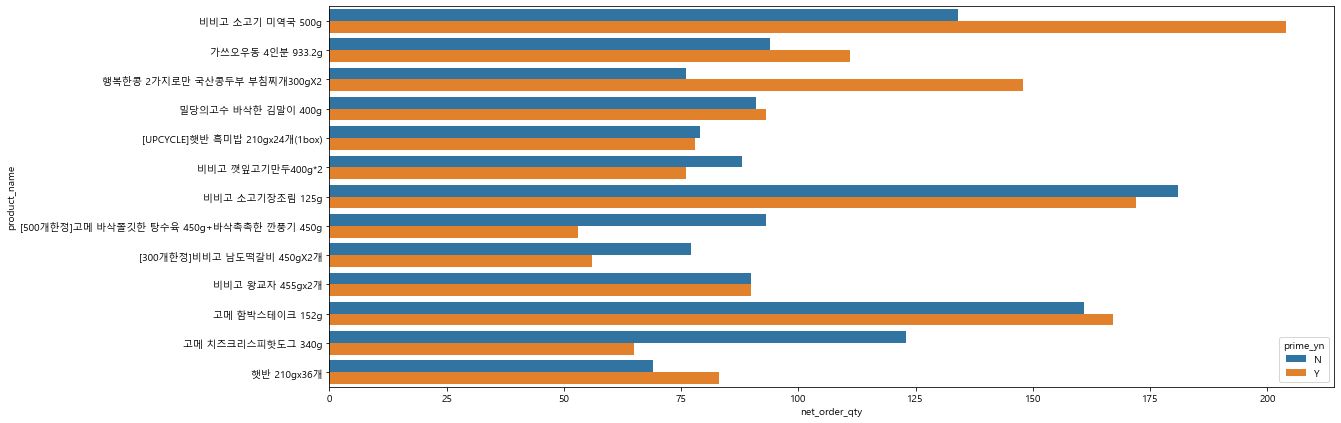

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(y='product_name', x='net_order_qty', data=pop_qty[pop_qty['product_name'].isin(pop_products[26:39])], order =pop_products[26:39], hue='prime_yn')

### 40~52위 상품

<AxesSubplot:xlabel='net_order_qty', ylabel='product_name'>

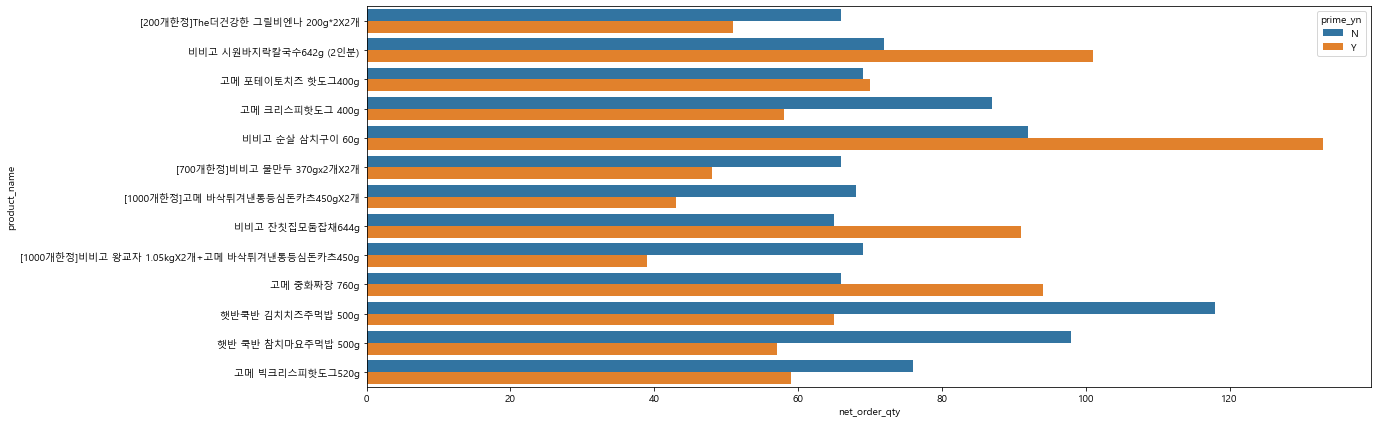

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(y='product_name', x='net_order_qty', data=pop_qty[pop_qty['product_name'].isin(pop_products[39:52])], order =pop_products[39:52], hue='prime_yn')

<AxesSubplot:xlabel='net_order_qty', ylabel='product_name'>

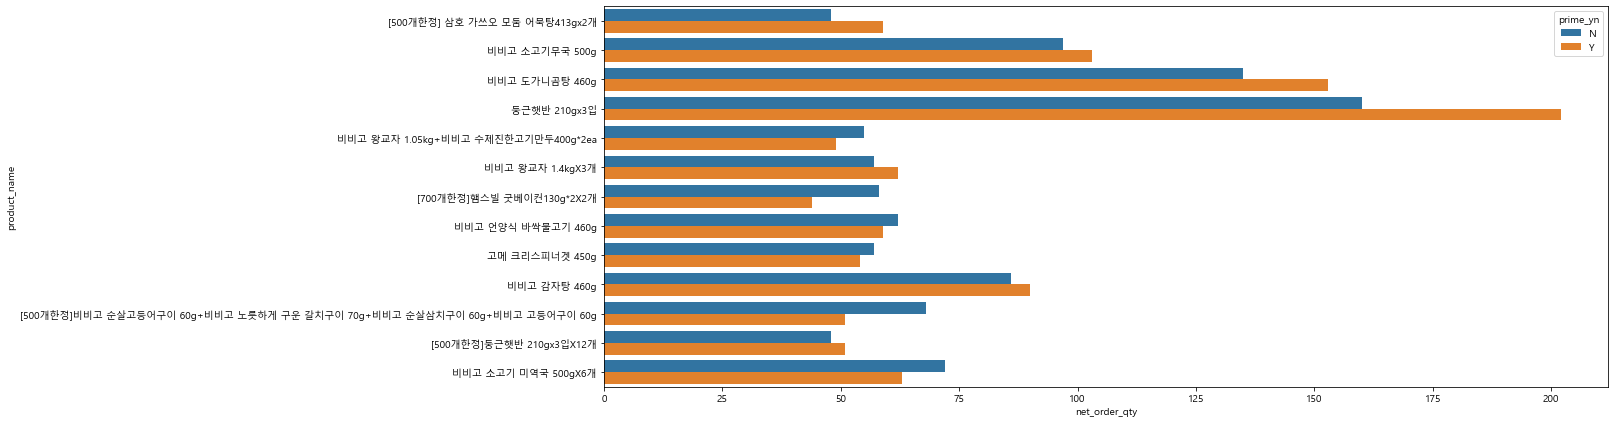

In [ ]:
fig, ax = plt.subplots(1, figsize=(18, 7))
sns.barplot(y='product_name', x='net_order_qty', data=pop_qty[pop_qty['product_name'].isin(pop_products[52:65])], order =pop_products[52:65], hue='prime_yn')

-> 판매량이 1위인 상품은 프라임 회원이 더 많지만, 다음으로는 판매량이 5, 6, 12, 13위인 상품이 프라임 회원이 더 많은 것으로 나타났다.
즉, 2-4위, 7-11위 등의 상품은 비프라임 회원이 더 많게 나타난 것을 알 수 있다.

또한, 상품의 인기 순위와 프라임 회원의 구매가 높은지의 유무 변수 사이의 상관관계가 0.09로 매우 낮은 점수가 나온 것을 알 수 있다.

즉, 판매량이 높은 상품을 프라임 회원이 더 많이 구매한다고 단정짓기는 어려울 것으로 예상된다.

---

# 가설6. 프라임 회원의 최종 구매 금액이 비프라임 회원보다 더 높을 것이다.

-> 가격은 약 6-16 사이의 값으로 스케일 조정된 값으로, 단순히 이 숫자를 더해나가게 되면, scd의 count수가 많을 수록 높은 구매 금액을 사용한다는 결론을 내리게 되므로, (예, amount가 8인 주문 3개를 단순히 더하면 amount가 24가 되며, 이는 가장 고액의 주문 데이터의 amount 16보다 높은 금액을 사용했다는 잘못된 결론을 내게 된다.)

prime, unprime 회원 각각 scd별로 주문 횟수(scd count수)로 그룹화하여, 구매한 내역의 amount를 평균내어 각각 비교하는 방법을 사용하였다.

예를 들면, scd의 count가 3인 prime 회원과 count가 3인 unprime 회원들의 각각 평균 amount를 비교하여, amount가 크게 나올 수록, 최종 구매 금액이 높다고 비교하는 방식이다.

In [ ]:
prime_data = data[data['prime_yn'] == 'Y']
unprime_data = data[data['prime_yn'] == 'N']

In [ ]:
total1_scd_cnt = data.groupby('scd')['product_name'].count().reset_index().sort_values(by='product_name', ascending=False)
total1_scd_cnt.rename(columns={'product_name' : 'cnt'}, inplace=True)
total1_scd_cnt

,scd,cnt
5743,20230117132732,54
5304,20230117125460,48
3459,20230114101430,47
5080,20230116122566,46
4258,20230115111567,46
...,...,...
4918,20230116120371,1
2461,20230111071770,1
2460,20230111071029,1
2459,20230111070109,1


In [ ]:
total1_scd_cnt['cnt'].median()

3.0

In [ ]:
prime_scd_cnt = prime_data.groupby('scd')['product_name'].count().reset_index().sort_values(by='product_name', ascending=False)
prime_scd_cnt.rename(columns={'product_name' : 'cnt'}, inplace=True)
prime_scd_cnt

,scd,cnt
2988,20230117132732,54
2778,20230117125460,48
1782,20230114101430,47
2650,20230116122566,46
2183,20230115111567,46
...,...,...
2632,20230116122212,1
1367,20230112087461,1
2634,20230116122221,1
2635,20230116122239,1


전체 10653명 데이터 중 10096명의 데이터가 scd가 13 이하이므로, 프라임 회원의 최종 구매 금액이 전체보다 높다고 가정하고 들어가겠습니다.

In [ ]:
cnt = 0
for i in range(1, 14):
    cnt += total1_scd_cnt['cnt'].value_counts()[i]

print(cnt)

10096


In [ ]:
total1_scd_cnt['cnt'].value_counts()

1     3842
2     1432
3     1052
4      878
5      692
6      554
7      408
8      339
9      258
10     231
11     194
12     114
13     102
14      99
15      67
16      59
17      57
18      45
20      36
19      36
21      23
22      21
24      19
23      19
28      11
26      10
25       9
31       7
29       7
30       7
27       5
32       5
46       2
33       2
34       2
45       1
38       1
40       1
54       1
36       1
48       1
42       1
39       1
47       1
Name: cnt, dtype: int64

In [ ]:
print(prime_scd_cnt['cnt'].value_counts().head(10))
print(prime_scd_cnt['cnt'].value_counts().index.max())

1     1955
2      666
3      492
4      391
5      301
6      280
7      207
8      178
9      136
10     126
Name: cnt, dtype: int64
54


In [ ]:
unprime_scd_cnt = unprime_data.groupby('scd')['product_name'].count().reset_index().sort_values(by='product_name', ascending=False)
unprime_scd_cnt.rename(columns={'product_name' : 'cnt'}, inplace=True)
unprime_scd_cnt

,scd,cnt
1792,20230115103939,45
1922,20230115106916,40
4813,20230129197024,34
5322,20230131216517,32
1835,20230115104950,31
...,...,...
2997,20230123148644,1
2998,20230123148664,1
3000,20230123148807,1
3002,20230123148941,1


In [ ]:
print(unprime_scd_cnt['cnt'].value_counts().head(10))
print(prime_scd_cnt['cnt'].value_counts().index.max())

1     1887
2      766
3      560
4      487
5      391
6      274
7      201
8      161
9      122
10     105
Name: cnt, dtype: int64
54


In [ ]:
prime_scd_cnt[prime_scd_cnt['cnt'] == 1]['scd']

2403    20230116116416
4645    20230128191406
2099    20230115109701
2377    20230116115802
1559    20230113095201
             ...      
2632    20230116122212
1367    20230112087461
2634    20230116122221
2635    20230116122239
1741    20230114100570
Name: scd, Length: 1955, dtype: int64

In [ ]:
prime_data[prime_data['scd'].isin(prime_scd_cnt[prime_scd_cnt['cnt'] == 1]['scd'])]

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,pop_prod_yn
27,20230127178915,미트마스터 한돈 삼겹살 300g x 2팩_패밀리데이,1,10.226585,M,3,Y,20230127,Y,False
42,20230125156200,비비고 꼬리곰탕 460gx2개,1,9.503383,M,3,Y,20230125,Y,False
47,20230118134859,미트마스터 한돈 항정살 300g x 2팩_패밀리데이,1,10.513498,M,4,Y,20230118,Y,False
113,20230125156503,[택배배송] 해물 짬뽕 비비고 만두 전골_밀키트,1,9.601571,F,3,N,20230125,Y,False
169,20230125158494,[UPCYCLE]햇반 흑미밥 210gx24개(1box),2,11.060290,M,5,Y,20230125,Y,True
...,...,...,...,...,...,...,...,...,...,...
45837,20230101963968,비비고 특양지곰탕 700g+비비고 왕교자 1.05kgX2개+비비고 남도떡갈비 450...,1,10.832300,M,5,N,20230101,Y,False
45844,20230101963415,비비고 메추리알장조림170gx2개 + 비비고 소고기 장조림 125gx2개,1,9.142490,M,2,Y,20230101,Y,False
45845,20230102973341,[앱전용특가]햇반 작은공기130g*6X2개,2,9.638545,M,4,N,20230102,Y,False
45851,20230101969574,[앱전용특가]햇반 작은공기130g*6X2개,3,10.043988,F,2,N,20230101,Y,False


In [ ]:
unprime_data[unprime_data['scd'].isin(unprime_scd_cnt[unprime_scd_cnt['cnt'] == 1]['scd'])]

,scd,product_name,net_order_qty,net_order_amt,gender,age_grp,employee_yn,order_date,prime_yn,pop_prod_yn
2,20230125158386,비비고 왕교자 1.05kg,1,9.348449,F,4,N,20230125,N,True
5,20230126167696,[UPCYCLE]햇반 흑미밥 210gx24개(1box),1,10.125110,F,3,N,20230126,N,True
29,20230126162220,[UPCYCLE]햇반 흑미밥 210gx24개(1box),1,9.965335,F,4,N,20230126,N,True
36,20230125158184,[UPCYCLE]햇반 흑미밥 210gx24개(1box),1,9.965335,M,5,N,20230125,N,True
103,20230125156082,발사믹드레싱 250g,1,8.361942,F,3,N,20230125,N,False
...,...,...,...,...,...,...,...,...,...,...
45833,20230101966600,[2023설사원선물신청] 스팸8호,3,11.174301,M,4,Y,20230101,N,False
45854,20230101969653,리턴업 갱년기케어 500mgX60캡슐(1개월)X2개,1,10.449149,M,2,N,20230101,N,False
45855,20230101966525,비비고 순살 고등어구이 60g,9,10.112613,M,3,N,20230101,N,True
45860,20230102975115,[2023설사원선물신청] 흑삼정 골드클래스 100gx2,1,11.597276,M,5,Y,20230102,N,False


In [ ]:
prime_data[prime_data['scd'].isin(prime_scd_cnt[prime_scd_cnt['cnt'] == 1]['scd'])]['net_order_amt'].mean()

10.698789194783654

In [ ]:
unprime_data[unprime_data['scd'].isin(unprime_scd_cnt[unprime_scd_cnt['cnt'] == 1]['scd'])]['net_order_amt'].mean()

10.491675121043997

In [ ]:
prime_amount = []
unprime_amount = []

In [ ]:
for i in range(1,55):
        prime_amount.append(prime_data[prime_data['scd'].isin(prime_scd_cnt[prime_scd_cnt['cnt'] == i]['scd'])]['net_order_amt'].mean())

In [ ]:
for i in range(1, 55):
        unprime_amount.append(unprime_data[unprime_data['scd'].isin(unprime_scd_cnt[unprime_scd_cnt['cnt'] == i]['scd'])]['net_order_amt'].mean())

In [ ]:
print(prime_amount)

[10.698789194783654, 9.886855568453473, 9.507410092796762, 9.292301431608047, 9.149642874708977, 9.061507474880974, 9.054591796398899, 8.963784223849018, 8.908720833186297, 8.845526916919047, 8.84846292668136, 8.868449672057135, 8.826049484676671, 8.718284949136693, 8.760654379224388, 8.639083486178569, 8.694808589245092, 8.748930953342303, 8.509720902897245, 8.622423502173076, 8.681703904053977, 8.423071744711233, 8.567722148658385, 8.674788423717947, 8.473267031448001, 8.645946674484613, 8.616577594938274, 8.696433610984124, 8.538097540077585, 8.672561070575004, 8.349785144419354, 8.568911892687499, 8.662310797606063, 8.69001332364706, nan, 9.298043776, nan, 8.397379624921053, 8.426037097102563, nan, nan, 8.025363193428573, nan, nan, nan, 8.445171067934778, 8.827502937319148, 8.854706724395834, nan, nan, nan, nan, nan, 9.047502365685185]


In [ ]:
print(unprime_amount)

[10.491675121043997, 9.698419629724548, 9.42162287765357, 9.209455314428109, 9.064309318372388, 9.073367275839436, 9.023655103065403, 8.896142177314427, 8.953964001407067, 8.822749215650452, 8.82303133525217, 8.863063881304928, 8.741547683196353, 8.77707666752439, 8.726666487697445, 8.71582575601562, 8.8139304807563, 8.661284311376987, 8.666002730733336, 8.792338671699996, 8.606547791077382, 8.682833602306813, 8.724525974947827, 8.66379110910417, 8.479576113989994, 8.62322322063077, 8.720365046037037, 8.57199481048214, 8.582160671735632, 8.690762080411112, 8.506640675629031, 9.020318484031247, nan, 8.591770164352942, nan, nan, nan, nan, nan, 8.450592853575, nan, nan, nan, nan, 8.208928007155555, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [ ]:
total_amounts = pd.DataFrame({'scd_counts' : [i for i in range(1, 55)], 'prime_amount' : prime_amount, 'unprime_amount' : unprime_amount})

In [ ]:
total_amounts['is_prime_higher'] = total_amounts['prime_amount'] > total_amounts['unprime_amount']

In [ ]:
total_amounts.dropna().head(10)

,scd_counts,prime_amount,unprime_amount,is_prime_higher
0,1,10.698789,10.491675,True
1,2,9.886856,9.698420,True
2,3,9.507410,9.421623,True
3,4,9.292301,9.209455,True
4,5,9.149643,9.064309,True
5,6,9.061507,9.073367,False
6,7,9.054592,9.023655,True
7,8,8.963784,8.896142,True
8,9,8.908721,8.953964,False
9,10,8.845527,8.822749,True


In [ ]:
total_amounts

,scd_counts,prime_amount,unprime_amount,is_prime_higher
0,1,10.698789,10.491675,True
1,2,9.886856,9.698420,True
2,3,9.507410,9.421623,True
3,4,9.292301,9.209455,True
4,5,9.149643,9.064309,True
5,6,9.061507,9.073367,False
6,7,9.054592,9.023655,True
7,8,8.963784,8.896142,True
8,9,8.908721,8.953964,False
9,10,8.845527,8.822749,True


scd_counts가 13 이하일 때, 6, 9인 경우 제외하고 모두 True를 나타내었으며,
scd_counts가 1-5일때는 모두 True를 나타내었다.

scd_counts 경계를 5 또는 13으로 나누면 좋을 것이라고 생각한다.

<AxesSubplot:>

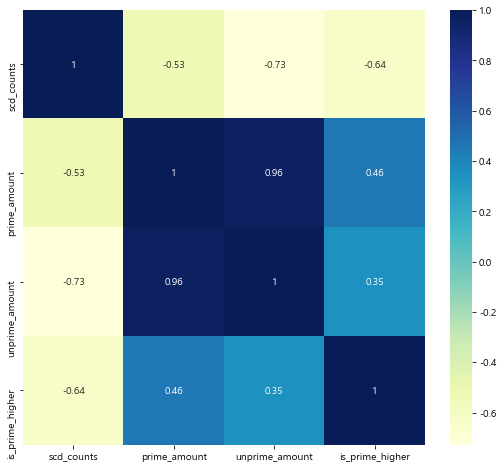

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(9, 8))
sns.heatmap(total_amounts.corr(), annot=True, cmap='YlGnBu', ax=ax)

# scd의 count수와 프라임 회원이 더 높은 가격을 소비하는가의 여부에 대한 상관관계는 약 -0.64로, 음의 상관관계를 나타낸다.

# 즉, scd의 count수가 낮을 수록 대체적으로 프라임 회원이 비프라임 회원보다 더 높은 가격에 구매하고, count수가 높을 수록 비프라임 회원이 프라임 회원보다 높은 가격에 구매하는 경향임을 알 수 있다.